## Car price prediction model

The goal of this program is to create a machine learning model that will predict the prices of cars based on various different features, all obtained in the dataset that can be found on the kaggle link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho


In [ ]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Obtain the dataset and store it in a variable
df = pd.read_csv("C:/Users/reibo/OneDrive/Dokumenti/dokumenti za faks/year 3/machine  learning/Car prices/car data.csv")

Check in order to see how the meta data looks like and check if there are any null-values

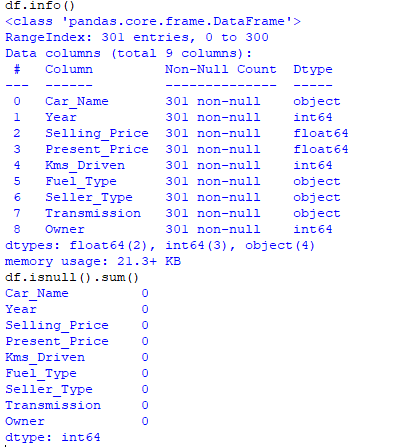

Next, I checked to see the data correlation heatmap and decide which factors will determine the model's prediction.

In [ ]:
# Plot the heatmap - correlation of data
cor = sns.heatmap(df.corr(), annot = True)
plt.title('Data correlation')
plt.show()

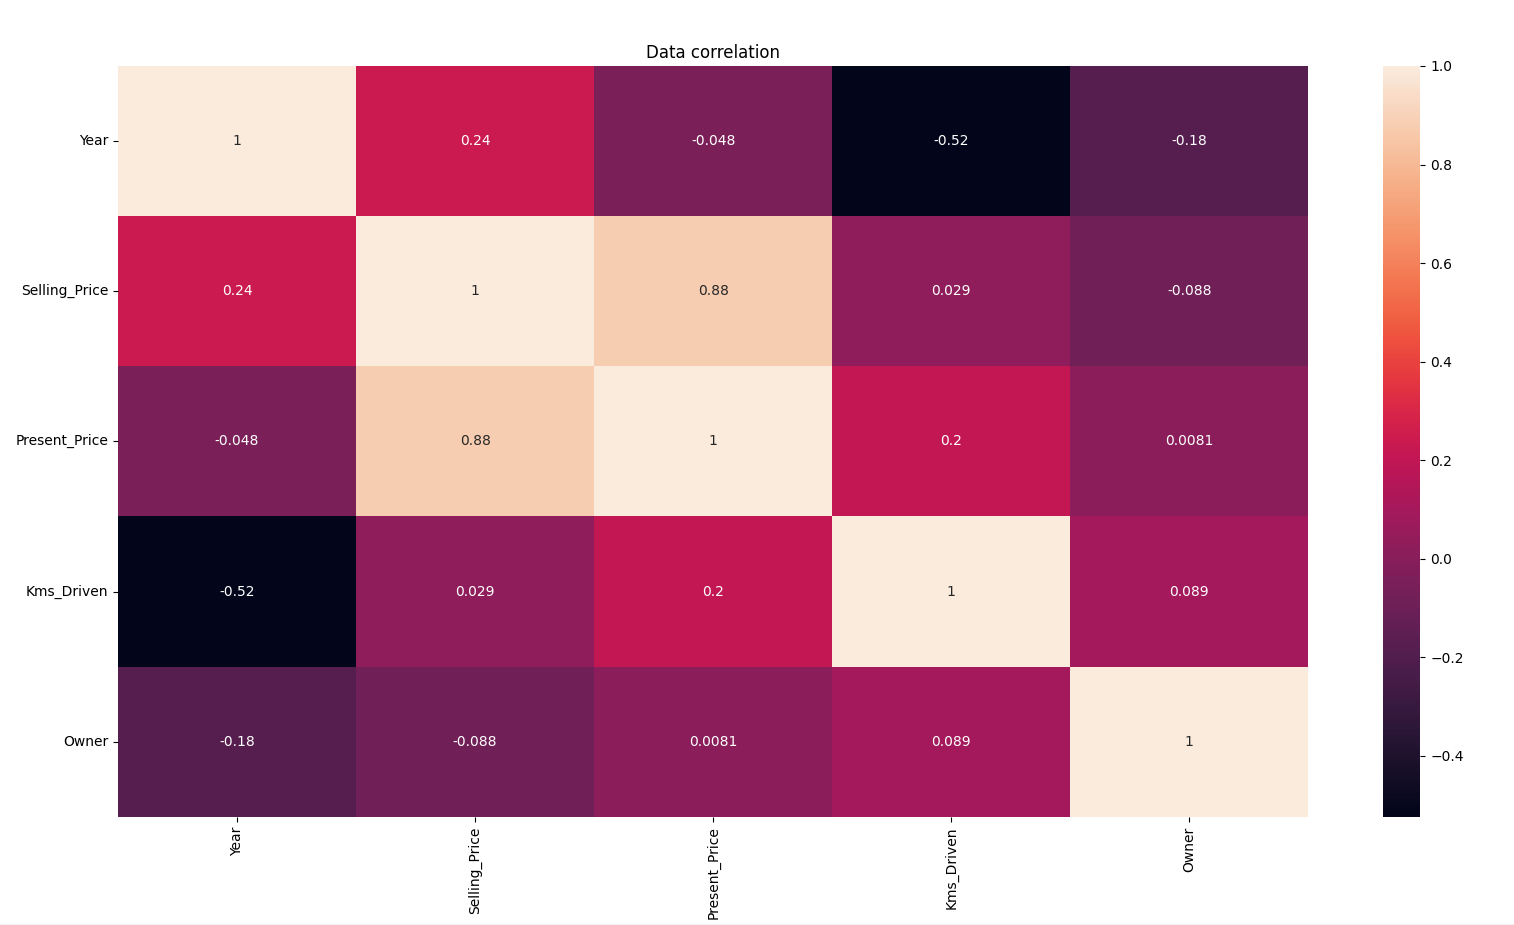

Since some of the columns contain repetitive names, I decided to make pandas dummy variables which will hold a numerical values instead of the textual labels.

In [ ]:
# Check which variables can be labelled using pandas dummies
print('\n Seller Types  - ',df['Seller_Type'].unique())
print('\n Transmission types - ',df['Transmission'].unique())
print('\n Owner types - ',df['Owner'].unique())

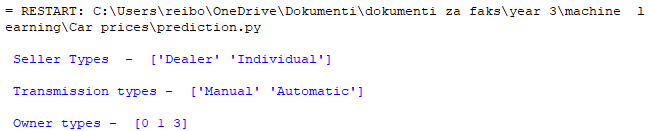

In [ ]:
# Creating dummies for the above variables
Fuel_type = pd.get_dummies(df['Fuel_Type'], drop_first = True)
Seller_Type = pd.get_dummies(df['Seller_Type'], drop_first = True)
Transmission = pd.get_dummies(df['Transmission'], drop_first = True)

# Drop the dummy variables from the data frame and combine them into a single one
df = df.drop(['Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Name'], axis=1)
df = pd.concat([df,Fuel_type, Seller_Type, Transmission], axis=1)

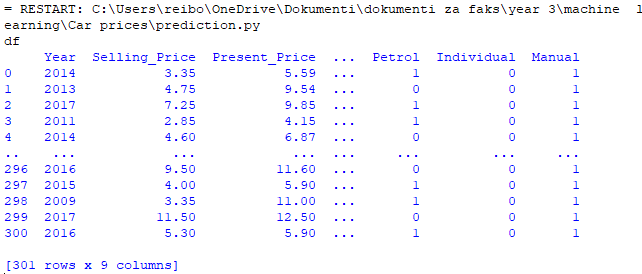

Splitting the data into 80% training data and 20% data that will be used for testing, building the model based on Linear Regression, training the model and testing its performance as well as creating a price prediction and evaluating the prediction with the coefficient of determination R².

In [ ]:
# Define the target variable
Y = df['Selling_Price']
X = StandardScaler().fit_transform(df)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=101)

# Create and train the model (using Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
print(model.score(X_test, y_test))

# Compare the prediction with the actual values and show the error
pred = model.predict(X_test)
pred_overview = pd.DataFrame()
pred_overview["truth"] = y_test
pred_overview["pred"] = pred
pred_overview["error"] = pred_overview["truth"] - pred_overview["pred"]
pred_overview["error"] = abs(pred_overview["error"].astype(int))
pred_overview = pred_overview.reset_index(drop=  True)
print(pred_overview)

score = r2_score(y_test, pred)
print(score)

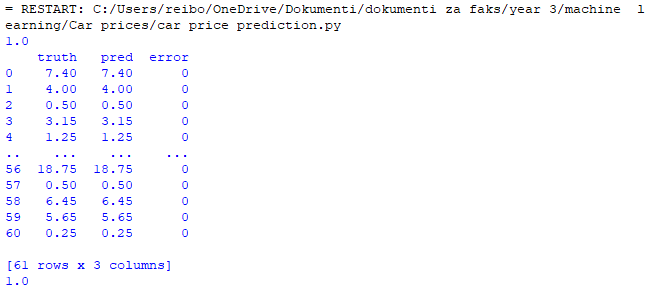

The model, surprisingly, works perfectly with 0 errors. This is usually not the case so I was a bit confused at first, but it seems that the model working on this data set is operating with 100% accuracy.

Because of this, I thought I made a mistake somewhere so tried to make a new model. This time, instead of using the fit_transform function, I didn't want to standardize the data so I simply dropped the target being the selling price from the dataframe and trained my model using the rest of the code above.

In [ ]:
#X = StandardScaler().fit_transform(df)
X = df.drop(['Selling_Price'], axis=1)

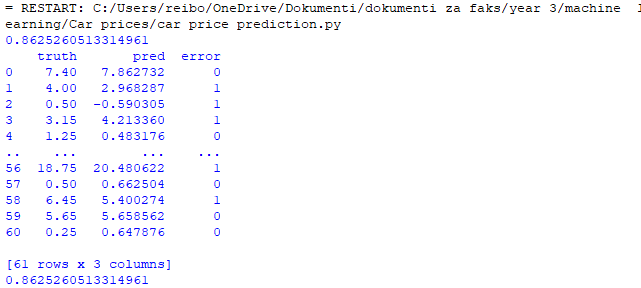

Despite showing more errors and the accuracy a little above 85%, the model is still pretty accurate.